# Avila Dataset

Students: **Miriam Coca**, **João Alves**, **Kimberly Toala** and **Rodrigo Venegas**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

We started by importing the data and removing the class column from the test dataset.

In [3]:
training = pd.read_csv('/content/drive/My Drive/DAPR Project/avila_training.txt',
                 sep=',', na_values='?', names=["Intercolumnar distance", "Upper margin", "Lower margin", "Exploitation",
                                                "Row number", "Modular ratio", "Interlinear spacing", "Weight", "Peak number",
                                                "MR/IS", "Class"])
test = pd.read_csv('/content/drive/My Drive/DAPR Project/avila_test.txt',
                 sep=',', na_values='?', names=["Intercolumnar distance", "Upper margin", "Lower margin", "Exploitation",
                                                "Row number", "Modular ratio", "Interlinear spacing", "Weight", "Peak number",
                                                "MR/IS", "Class"])

# change classes to integers 
c = {'A':0,'B':1,'C': 2,'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'W':9, 'X':10, 'Y':11}
training['Class'].apply(lambda x: c[x] if x in c else x)
training['Class2'] = training['Class'].apply(lambda x: c[x])
training = training.drop(['Class'], axis=1)

test['Class'].apply(lambda x: c[x] if x in c else x)
test['Class2'] = test['Class'].apply(lambda x: c[x])
test = test.drop(['Class'], axis=1)

In [4]:
training.shape

(10430, 11)

In [5]:
test.shape

(10437, 11)

In [6]:
training.head()

,Intercolumnar distance,Upper margin,Lower margin,Exploitation,Row number,Modular ratio,Interlinear spacing,Weight,Peak number,MR/IS,Class2
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,0
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,5


In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Intercolumnar distance  10430 non-null  float64
 1   Upper margin            10430 non-null  float64
 2   Lower margin            10430 non-null  float64
 3   Exploitation            10430 non-null  float64
 4   Row number              10430 non-null  float64
 5   Modular ratio           10430 non-null  float64
 6   Interlinear spacing     10430 non-null  float64
 7   Weight                  10430 non-null  float64
 8   Peak number             10430 non-null  float64
 9   MR/IS                   10430 non-null  float64
 10  Class2                  10430 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 896.5 KB


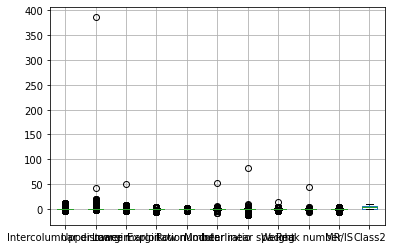

In [8]:
training.boxplot()

As we can see, the data is already normalized, so we don't have to do that.

## Classification

In [9]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Parameters

We are building a multiclass classifier with 12 possible classes and chose epochs=150, because with that the training accuracy is very high and the tes acuuracy is high as well.

In [10]:
batch_size = 128
num_classes = 12
epochs = 150

In [11]:
# convert class vectors to binary class matrices
y_train = to_categorical(training.iloc[:,-1], num_classes)
y_test = to_categorical(test.iloc[:,-1], num_classes)

In [12]:
# Build the model (10 features)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(10,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5632      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 12)                6156      
                                                                 
Total params: 274,444
Trainable params: 274,444
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Training

In [15]:
model.fit(training.iloc[:,:-1], y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/150
82/82 [==============================] - 3s 19ms/step - loss: 1.4598 - accuracy: 0.5410
Epoch 2/150
82/82 [==============================] - 1s 16ms/step - loss: 1.0933 - accuracy: 0.6299
Epoch 3/150
82/82 [==============================] - 1s 17ms/step - loss: 0.9426 - accuracy: 0.6636
Epoch 4/150
82/82 [==============================] - 2s 20ms/step - loss: 0.8536 - accuracy: 0.6892
Epoch 5/150
82/82 [==============================] - 2s 20ms/step - loss: 0.7936 - accuracy: 0.7020
Epoch 6/150
82/82 [==============================] - 2s 18ms/step - loss: 0.7458 - accuracy: 0.7145
Epoch 7/150
82/82 [==============================] - 1s 18ms/step - loss: 0.7142 - accuracy: 0.7238
Epoch 8/150
82/82 [==============================] - 1s 17ms/step - loss: 0.6773 - accuracy: 0.7364
Epoch 9/150
82/82 [==============================] - 1s 17ms/step - loss: 0.6571 - accuracy: 0.7457
Epoch 10/150
82/82 [==============================] - 1s 16ms/step - loss: 0.6282 - accuracy: 0.7544

### Test & Evaluation

In [16]:
model.evaluate(test.iloc[:,:-1], y_test, verbose=0)[1]

0.9517102837562561

As we can see, the accuracy of our algorithm is significantly high and we can be confident that the model is not overfitted since the accuracy for the training and test dataset are very similar. If the model was overfitted, the accuracy for the training set would be high but the one for the test set would be low.

In [17]:
preds = pd.Series(np.argmax(model.predict(test.iloc[:,:-1]), axis=-1).tolist(),name='preds')
reals = pd.Series([x.tolist().index(1.0) for x in y_test],name='reals')
reals.index = range(len(reals))
pd.crosstab(reals,preds)

preds,0,1,2,3,4,5,6,7,8,9,10,11
reals,,,,,,,,,,,,
0,4044,0,0,1,17,164,27,27,4,0,0,2
1,0,5,0,0,0,0,0,0,0,0,0,0
2,8,0,90,3,1,0,0,1,0,0,0,0
3,1,0,0,339,9,3,0,0,0,0,1,0
4,9,0,0,4,1062,11,2,1,0,0,6,0
5,75,0,0,4,6,1853,15,9,0,0,0,0
6,22,0,0,0,1,12,412,0,0,0,0,0
7,23,0,3,0,0,1,3,489,0,0,1,0
8,6,0,0,0,0,0,0,0,826,0,0,0


# Other classification methods

We will analyse different classification methods (KNClassifier, SVM, MLP) through the accuracy score of each model in order to compare it with the deep learning one.

In [18]:
#Define generic classifier function

from sklearn.metrics import accuracy_score

def classifier(clf):
    clf.fit(training.iloc[:,:-1], training.iloc[:,-1])
    preds = pd.Series(clf.predict(test.iloc[:,:-1]), name='preds')
    reals = pd.Series(test.iloc[:,-1],name='reals')
    reals.index = preds.index
    print('acc:', accuracy_score(reals, preds))
    print()
    print(pd.crosstab(reals, preds))
    print()
    return clf

In [19]:
#Define tuning function to look for the best parameters

from sklearn.model_selection import GridSearchCV
def tuning(clf):
  clf.fit(training.iloc[:,:-1], training.iloc[:,-1])
  print('pars:', clf.best_params_)
  preds = pd.Series(clf.predict(test.iloc[:,:-1]),
                    name='preds')
  reals = pd.Series(test.iloc[:,-1],name='reals')
  reals.index = preds.index
  print('acc:', accuracy_score(reals, preds))
  print()
  print(pd.crosstab(reals, preds))
  print()

### KNeighbors Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier(KNeighborsClassifier(3))

acc: 0.7578806170355467

preds    0   1   2    3    4     5    6    7    8   9    10   11
reals                                                           
0      3686   0   2   18   49   446   44   33    2   0    3    3
1         0   5   0    0    0     0    0    0    0   0    0    0
2        36   0  45    2    8    12    0    0    0   0    0    0
3        84   0   6  195   24    36    1    5    1   0    1    0
4       213   0  13   30  712    65   11   38    1   0   10    2
5       586   0   2    8   16  1305   32   11    2   0    0    0
6       131   0   0    0   22    52  235    6    0   0    1    0
7       145   0   5    3   41    41    8  276    0   0    1    0
8        26   0   0    2    4     3    1    1  788   0    1    6
9        12   0   0    0    3     1    0    0    0  27    2    0
10       36   0   0    3   15     2    0    5    3   0  435   23
11       25   0   0    4    8     1    0    0   18   0   10  201



KNeighborsClassifier(n_neighbors=3)

In [21]:
pgrid = {'n_neighbors': [1,3,5,7,11,17],
         'weights':['uniform','distance']}
tuning(GridSearchCV(KNeighborsClassifier(),
                    pgrid,cv=5,scoring='accuracy'))

pars: {'n_neighbors': 1, 'weights': 'uniform'}
acc: 0.7578806170355467

preds    0   1   2    3    4     5    6    7    8   9    10   11
reals                                                           
0      3442   0   3   26   81   546   78   93    3   1    7    6
1         0   5   0    0    0     0    0    0    0   0    0    0
2        19   0  57    5   11     8    0    3    0   0    0    0
3        52   0   6  218   35    36    1    3    1   0    1    0
4       121   0   8   35  764    73   19   49    0   5   17    4
5       498   0   3   10   27  1339   55   27    2   0    1    0
6        86   0   0    0   21    58  271    8    0   0    3    0
7        91   0   3    3   34    49   12  328    0   0    0    0
8        15   0   0    1    5     5    0    1  795   0    3    7
9         3   0   0    0    3     1    1    0    0  35    2    0
10       16   0   1    2   22     5    3    4    0   0  442   27
11       14   0   0    0    9     3    0    1   10   1   15  214



We can see that the tuning function indicates that the highest accuracy score is reached when using the KNClassifier with 1 neighbor and with uniform weights. However, this accuracy score is the same as the one previously obtained with 3 neighbors. When more neighbors are used, the accuracy score decreases.
It is also clear that the accuracy is almost 20% lower using KNClassifier when compared to the neural network.

### SVM Classifier

In [22]:
from sklearn.svm import SVC
classifier(SVC())

acc: 0.6745233304589442

preds    0   1   2   3    4    5    6    7    8   9    10   11
reals                                                         
0      3987   0   0   0   70  184   19   11    5   0    6    4
1         0   5   0   0    0    0    0    0    0   0    0    0
2        49   0   4   0   32   16    0    2    0   0    0    0
3       193   0   0  14  113   21    2   10    0   0    0    0
4       243   0   0   2  721   58    2   51    0   0   13    5
5      1364   0   0   0   31  521   41    2    0   0    0    3
6       204   0   0   0   32   46  154    6    0   0    5    0
7       227   0   0   0   31   49    6  206    0   0    1    0
8        31   0   0   0    0    1    1    0  798   0    1    0
9        27   0   0   0    8    0    0    0    0   9    1    0
10       39   0   0   0   35    0    0    0    0   0  421   27
11       21   0   0   0    9    0    1    0   12   0   24  200



SVC()

As we can see the results obtained from SVM have a lower accuracy score than the results from the KNClassifier.

###MLP Classifier



In [23]:
from sklearn.neural_network import MLPClassifier
clf = classifier(MLPClassifier(hidden_layer_sizes=(25,)))

acc: 0.7217591261856855

preds    0   1   2    3    4    5    6    7    8   9    10   11
reals                                                          
0      3617   0   2   31   99  390   65   51    7   7   14    3
1         0   5   0    0    0    0    0    0    0   0    0    0
2        22   0  16   19   33   11    0    1    1   0    0    0
3        43   0   0  182  106   16    1    4    0   0    1    0
4       135   0   6   50  777   64    8   36    0   0   14    5
5       903   0   0   10   42  932   63   10    0   0    0    2
6       121   0   0    0   29   46  234   12    0   0    5    0
7       123   0   0    0   28   22   31  314    1   0    0    1
8        22   0   0    0    0    5    3    0  798   3    1    0
9        14   0   0    0    7    0    0    0    0  23    1    0
10       14   0   0    4   39    5    0    2    0   1  427   30
11        7   0   0    2    7    2    1    3   17   0   20  208



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


The MLP Classifier has a higher accuracy than SVM, but lower than KNClassifier and significantly lower than the neural network's.

# Conclusion

In conclusion, the parameters were chosen in order to avoid both underfitting and overfitting and, in fact we can say the results obtained were fairly good and the accuracy of the neural network built was very high both for the training and test datasets. 

This is actually confirmed when we compare the accuracy of the deep learning algorithm with the ones that used machine learning and see it is more than 20% higher.